In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [3]:
for i in ["Education", "Marital_Status"] : 
    print(i," : ",df[i].unique())

Education  :  ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status  :  ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [4]:
df = df.drop("ID", axis=1)

We can see that Income Column contains some null value : 
- We can either remove the rows with null values at income feature
- or we can fill the missing values through : 
    - filling with the mean value 
    - filling with the median value 
    - searching for the feature(s) with which Income is most correlated and perform a linear regression
    - using any other regression model
    - using K-Nearest Neighbors Imputation

**KNN for Imputation**

In [5]:
from sklearn.impute import KNNImputer

# Create a copy of the DataFrame to avoid modifying the original data
df_imputed = df.copy()

# Initialize the KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# Perform KNN imputation for the missing "Income" values
income_column = df[['Income']]
df_imputed['Income'] = knn_imputer.fit_transform(income_column)

In [6]:
df = df_imputed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

C:\Users\azizs\AppData\Local\Temp\ipykernel_51016\1588287276.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Marital_Status', data=df, ax=axes[0], palette=pastel_palette)
C:\Users\azizs\AppData\Local\Temp\ipykernel_51016\1588287276.py:10: UserWarning: 
The palette list has fewer values (5) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y='Marital_Status', data=df, ax=axes[0], palette=pastel_palette)
C:\Users\azizs\AppData\Local\Temp\ipykernel_51016\1588287276.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Education', data=df, ax=axes[1], palette=pastel_palette)


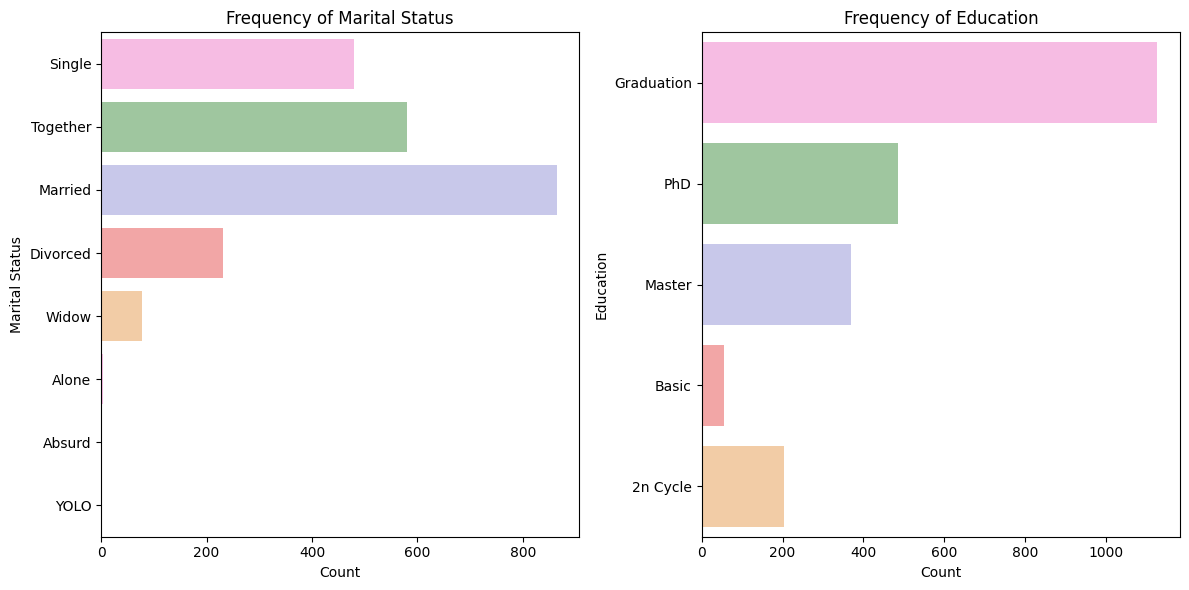

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

pastel_palette = ["#FFB3E6", "#99CC99", "#C2C2F0", "#FF9999", "#FFCC99"]


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot horizontal histogram for "Marital_Status" with the custom palette
sns.countplot(y='Marital_Status', data=df, ax=axes[0], palette=pastel_palette)
axes[0].set_title('Frequency of Marital Status')
axes[0].set_ylabel('Marital Status')
axes[0].set_xlabel('Count')

# Plot horizontal histogram for "Education" with the custom palette
sns.countplot(y='Education', data=df, ax=axes[1], palette=pastel_palette)
axes[1].set_title('Frequency of Education')
axes[1].set_ylabel('Education')
axes[1].set_xlabel('Count')

# Adjust the layout
plt.tight_layout()
plt.show()


**Feature Engineering**

In [8]:
#Age of customer today 
df["Age"] = 2021-df["Year_Birth"]
df = df.drop('Year_Birth', axis=1)

print(df["Age"])

0       64
1       67
2       56
3       37
4       40
        ..
2235    54
2236    75
2237    40
2238    65
2239    67
Name: Age, Length: 2240, dtype: int64


In [9]:
#Total spendings on various items
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
print(df["Spent"])

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Spent, Length: 2240, dtype: int64


In [10]:
#Deriving living situation by marital status"Alone"
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In [11]:
#Feature indicating total children living in the household
df["Children"]=df["Kidhome"]+df["Teenhome"]

In [12]:
#Feature for total members in the householde
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]

In [13]:
#Segmenting education levels in three groups
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [15]:
print(df["Dt_Customer"])

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object


In [16]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

# Calculate the newest and oldest customer enrollment dates
newest_customer_date = df["Dt_Customer"].max()
oldest_customer_date = df["Dt_Customer"].min()

# Calculate the "Customer_For" feature
df["Customer_For"] = (newest_customer_date - df["Dt_Customer"]).dt.days

# Convert "Customer_For" to numeric, handling any errors
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")

# Print the newest and oldest customer enrollment dates
print("The newest customer's enrolment date in the records:", newest_customer_date)
print("The oldest customer's enrolment date in the records:", oldest_customer_date)


The newest customer's enrolment date in the records: 2014-06-29 00:00:00
The oldest customer's enrolment date in the records: 2012-07-30 00:00:00


In [17]:
df.describe()

,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Children,Family_Size,Customer_For
count,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,0.013393,0.009375,3.0,11.0,0.149107,52.194196,605.798214,0.950446,2.595089,353.582143
min,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.0,11.0,0.000000,25.000000,5.000000,0.000000,1.000000,0.000000
25%,35538.750000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,3.0,11.0,0.000000,44.000000,68.750000,0.000000,2.000000,180.750000
50%,51741.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,0.000000,0.000000,3.0,11.0,0.000000,51.000000,396.000000,1.000000,3.000000,355.500000
75%,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,0.000000,0.000000,3.0,11.0,0.000000,62.000000,1045.500000,1.000000,3.000000,529.000000
max,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,1.000000,1.000000,3.0,11.0,1.000000,128.000000,2525.000000,3.000000,5.000000,699.000000
std,25037.797168,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,0.114976,0.096391,0.0,0.0,0.356274,11.984069,602.249288,0.751803,0.906959,202.122512


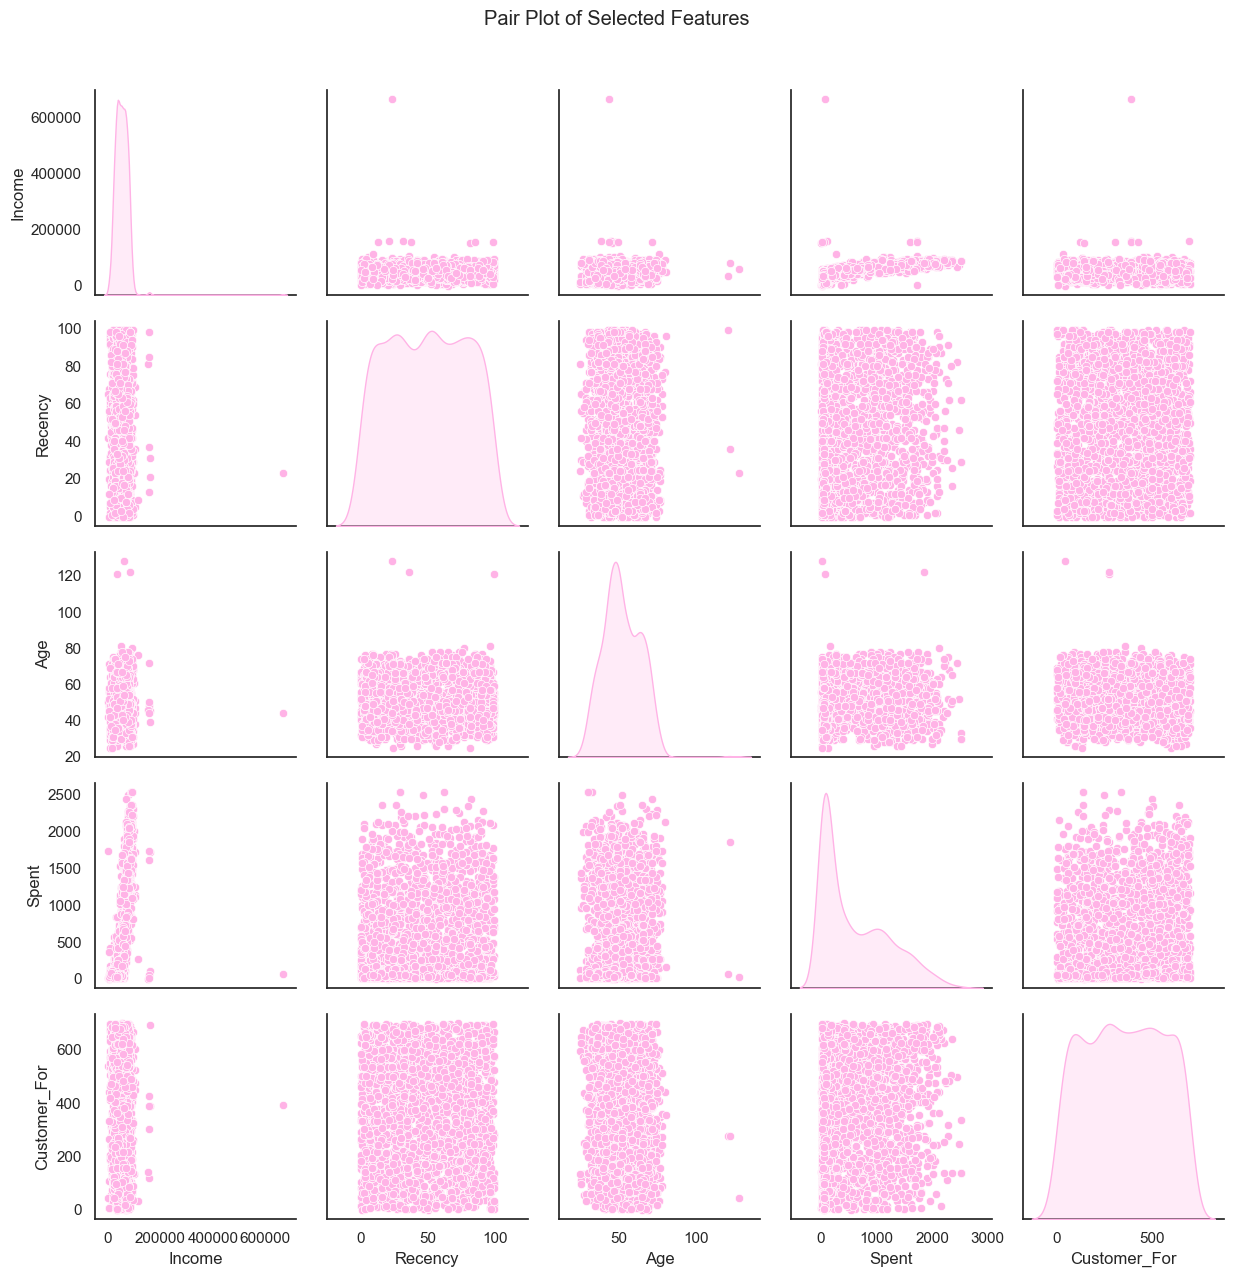

In [19]:
# Select the columns for the pair plot
To_Plot = ["Income", "Recency", "Age", "Spent", "Customer_For"]
plot_data = df[To_Plot]

# Define a custom pastel color palette
pastel_palette = ["#FFB3E6", "#99CC99", "#C2C2F0", "#FF9999", "#FFCC99"]

# Set the style and palette
sns.set(style="white")
sns.set_palette(pastel_palette)

# Create the pair plot
pair_plot = sns.pairplot(plot_data, diag_kind="kde")

# Customize the layout
pair_plot.fig.suptitle("Pair Plot of Selected Features", y=1.02)
plt.tight_layout()
plt.show()

In [22]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children,Family_Size,Customer_For
0,Graduate,Single,58138.0,0,0,2012-09-04,58,635,88,546,...,0,3,11,1,64,1617,Alone,0,1,663
1,Graduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,...,0,3,11,0,67,27,Alone,2,3,113
2,Graduate,Together,71613.0,0,0,2013-08-21,26,426,49,127,...,0,3,11,0,56,776,Partner,0,2,312
3,Graduate,Together,26646.0,1,0,2014-02-10,26,11,4,20,...,0,3,11,0,37,53,Partner,1,3,139
4,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,43,118,...,0,3,11,0,40,422,Partner,1,3,161


In [23]:
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer"]
df = df.drop(to_drop, axis=1)

# Assuming df is your DataFrame
df = pd.get_dummies(df, columns=["Living_With", "Education"], prefix=["Living_With", "Education"])

df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Age,Spent,Children,Family_Size,Customer_For,Living_With_Alone,Living_With_Partner,Education_Graduate,Education_Postgraduate,Education_Undergraduate
0,58138.0,0,0,58,635,88,546,172,88,88,...,64,1617,0,1,663,True,False,True,False,False
1,46344.0,1,1,38,11,1,6,2,1,6,...,67,27,2,3,113,True,False,True,False,False
2,71613.0,0,0,26,426,49,127,111,21,42,...,56,776,0,2,312,False,True,True,False,False
3,26646.0,1,0,26,11,4,20,10,3,5,...,37,53,1,3,139,False,True,True,False,False
4,58293.0,1,0,94,173,43,118,46,27,15,...,40,422,1,3,161,False,True,False,True,False


In [24]:
# Assuming df is your DataFrame
df["Living_With_Alone"] = df["Living_With_Alone"].astype(bool).astype(int)
df["Living_With_Partner"] = df["Living_With_Partner"].astype(bool).astype(int)
df["Education_Graduate"] = df["Education_Graduate"].astype(bool).astype(int)
df["Education_Postgraduate"] = df["Education_Postgraduate"].astype(bool).astype(int)
df["Education_Undergraduate"] = df["Education_Undergraduate"].astype(bool).astype(int)

In [27]:
for column in df.columns:
    data_type = df[column].dtype
    has_null_values = df[column].isnull().any()
    print(column,data_type,has_null_values)

Income float64 False
Kidhome int64 False
Teenhome int64 False
Recency int64 False
MntWines int64 False
MntFruits int64 False
MntMeatProducts int64 False
MntFishProducts int64 False
MntSweetProducts int64 False
MntGoldProds int64 False
NumDealsPurchases int64 False
NumWebPurchases int64 False
NumCatalogPurchases int64 False
NumStorePurchases int64 False
NumWebVisitsMonth int64 False
AcceptedCmp3 int64 False
AcceptedCmp4 int64 False
AcceptedCmp5 int64 False
AcceptedCmp1 int64 False
AcceptedCmp2 int64 False
Complain int64 False
Z_CostContact int64 False
Z_Revenue int64 False
Response int64 False
Age int64 False
Spent int64 False
Children int64 False
Family_Size int64 False
Customer_For int64 False
Living_With_Alone int32 False
Living_With_Partner int32 False
Education_Graduate int32 False
Education_Postgraduate int32 False
Education_Undergraduate int32 False


In [29]:
df = df.drop(["Z_CostContact","Z_Revenue"], axis=1)

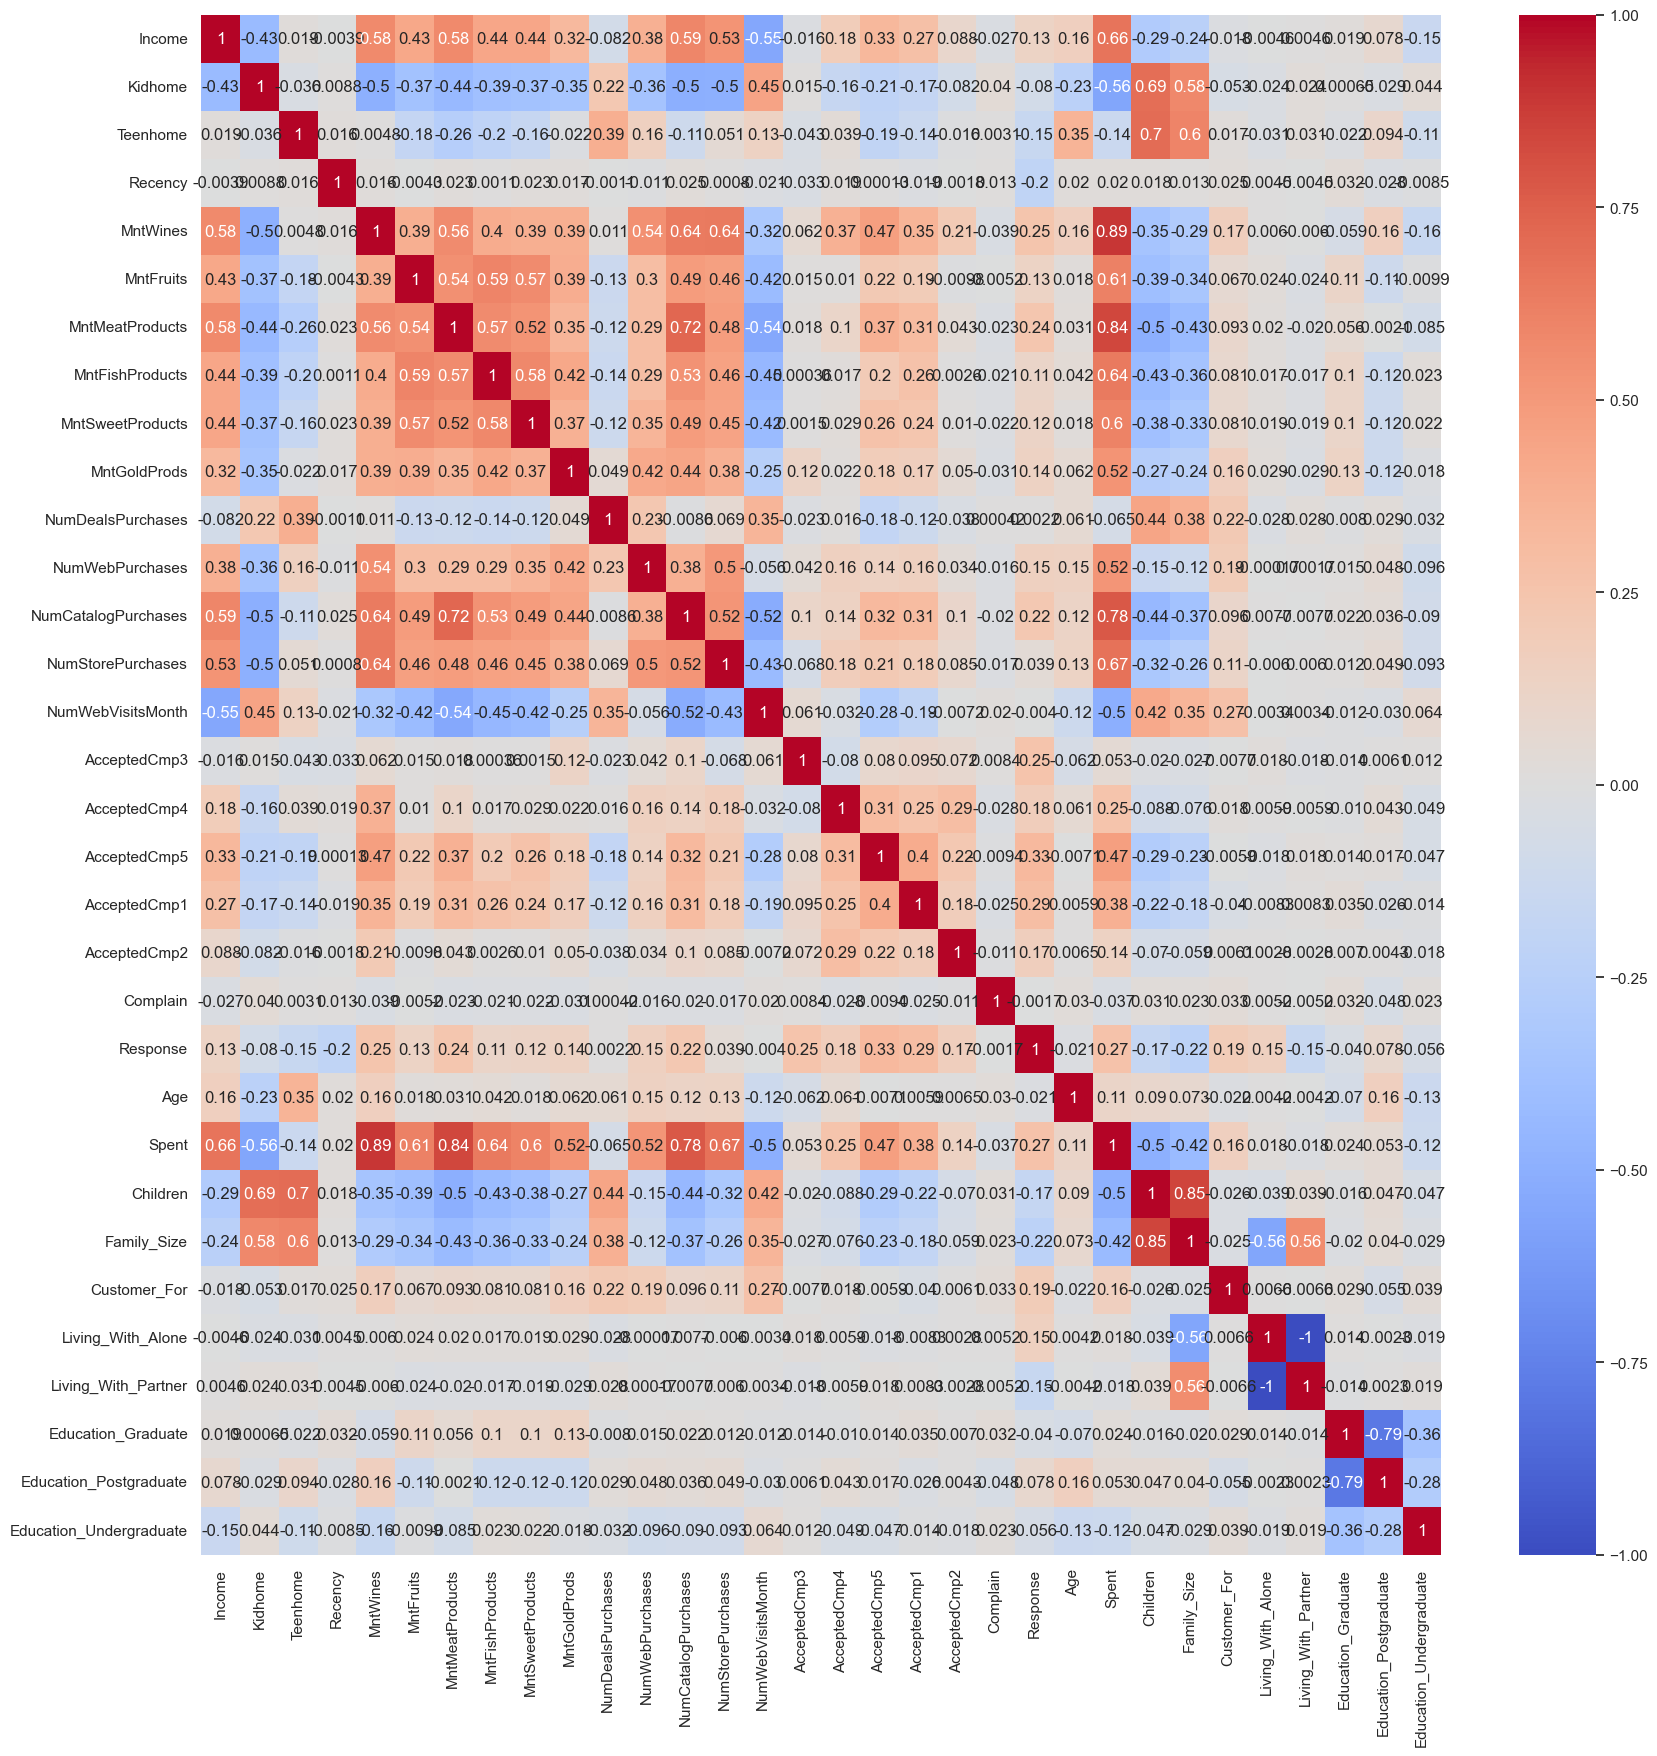

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat= df.corr()
# Assuming corrmat is your correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, cmap="coolwarm", center=0)
plt.show()


**Principal Component Analysis**

In [31]:
#Creating a copy of data
cp = df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
cp = cp.drop(cols_del, axis=1)

from sklearn.preprocessing import StandardScaler
#Scaling
scaler = StandardScaler()
scaler.fit(cp)
scaled_cp = pd.DataFrame(scaler.transform(cp),columns= cp.columns )

scaled_cp.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Age,Spent,Children,Family_Size,Customer_For,Living_With_Alone,Living_With_Partner,Education_Graduate,Education_Postgraduate,Education_Undergraduate
0,0.235327,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,...,0.985345,1.679417,-1.264505,-1.759115,1.531185,1.346874,-1.346874,0.993769,-0.786446,-0.360002
1,-0.235826,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,...,1.235733,-0.961275,1.396361,0.446548,-1.190545,1.346874,-1.346874,0.993769,-0.786446,-0.360002
2,0.773633,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,...,0.317643,0.282673,-1.264505,-0.656283,-0.205773,-0.742460,0.742460,0.993769,-0.786446,-0.360002
3,-1.022732,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,...,-1.268149,-0.918094,0.065928,0.446548,-1.061881,-0.742460,0.742460,0.993769,-0.786446,-0.360002
4,0.241519,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,...,-1.017761,-0.305254,0.065928,0.446548,-0.953012,-0.742460,0.742460,-1.006270,1.271543,-0.360002


In [32]:
from sklearn.decomposition import PCA

# Initialize the PCA model
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(scaled_cp)

PCA()

In [34]:
# Explained variance by each principal component
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = explained_variance.cumsum()

# Create a list of feature names
feature_names = df.columns

# Print the explained variance for each principal component along with the feature name
for i, (variance, cumulative) in enumerate(zip(explained_variance, cumulative_variance)):
    print(f"Principal Component {i+1}: Explained Variance = {variance:.4f}, Cumulative Variance = {cumulative:.4f}, Feature = {feature_names[i]}")

Principal Component 1: Explained Variance = 0.3058, Cumulative Variance = 0.3058, Feature = Income
Principal Component 2: Explained Variance = 0.1137, Cumulative Variance = 0.4195, Feature = Kidhome
Principal Component 3: Explained Variance = 0.0849, Cumulative Variance = 0.5044, Feature = Teenhome
Principal Component 4: Explained Variance = 0.0774, Cumulative Variance = 0.5817, Feature = Recency
Principal Component 5: Explained Variance = 0.0593, Cumulative Variance = 0.6411, Feature = MntWines
Principal Component 6: Explained Variance = 0.0463, Cumulative Variance = 0.6873, Feature = MntFruits
Principal Component 7: Explained Variance = 0.0426, Cumulative Variance = 0.7300, Feature = MntMeatProducts
Principal Component 8: Explained Variance = 0.0402, Cumulative Variance = 0.7702, Feature = MntFishProducts
Principal Component 9: Explained Variance = 0.0310, Cumulative Variance = 0.8012, Feature = MntSweetProducts
Principal Component 10: Explained Variance = 0.0291, Cumulative Variance

In [37]:
# Get the factor loadings (weights) for each feature
factor_loadings = pca.components_

# Create a DataFrame to display the factor loadings
factor_map = pd.DataFrame(factor_loadings, columns=scaled_cp.columns)

# Print the factor map
print("Factor Map for Features:")
print(factor_map)

Factor Map for Features:
          Income   Kidhome  Teenhome       Recency  MntWines  MntFruits  \
0   2.547274e-01 -0.253341 -0.088015  4.221190e-03  0.271335   0.250752   
1   1.347967e-01  0.021953  0.405224  1.173276e-02  0.183312  -0.006788   
2   2.493162e-02 -0.037572  0.246993 -1.246839e-03  0.120469  -0.092896   
3  -7.073182e-02  0.106632  0.078664  4.588104e-02 -0.059685   0.102430   
4   1.852875e-01 -0.057823  0.230130  4.654601e-02 -0.083020  -0.006724   
5   6.628941e-02  0.107085  0.223282  3.287492e-02 -0.170454   0.190410   
6   1.335917e-01  0.539764 -0.195555  9.050648e-02  0.027323   0.136923   
7  -4.210914e-02 -0.031391 -0.003854  9.771992e-01  0.020417  -0.056100   
8  -9.053740e-02  0.104307 -0.017956 -1.271624e-01 -0.169527   0.231680   
9   2.372970e-01 -0.022653  0.047941 -9.177172e-02  0.212630  -0.304354   
10 -6.154000e-02  0.124761 -0.166788 -4.098520e-02 -0.060461  -0.200099   
11 -1.602281e-01  0.106024 -0.314544  3.564765e-02 -0.045598   0.062809   


In [59]:
# Save the DataFrame to a CSV file
scaled_cp.to_csv("scaled_cp_for_R.csv", sep="\t", index=False)

<img src="pca_in_R.png" width="600" height="400" alt="Sample Image">

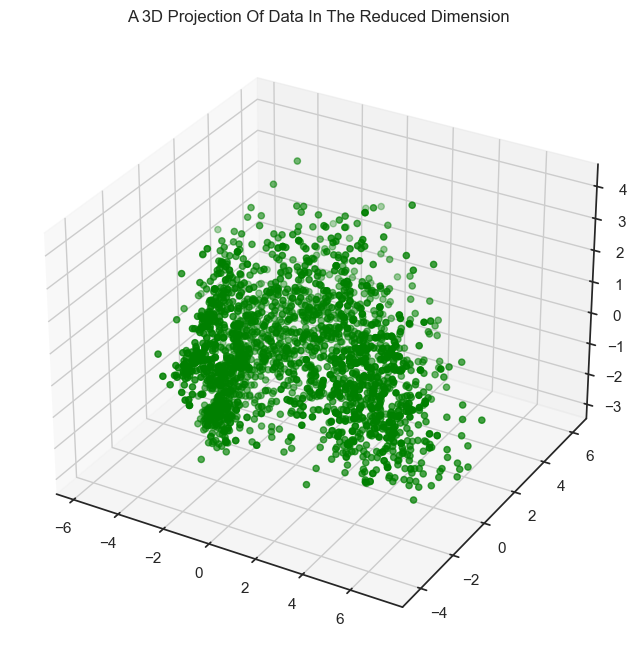

In [88]:
pca = PCA(n_components=3)
pca.fit(scaled_cp)
PCA_ds = pd.DataFrame(pca.transform(scaled_cp), columns=(["col1","col2", "col3"]))

#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="green", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

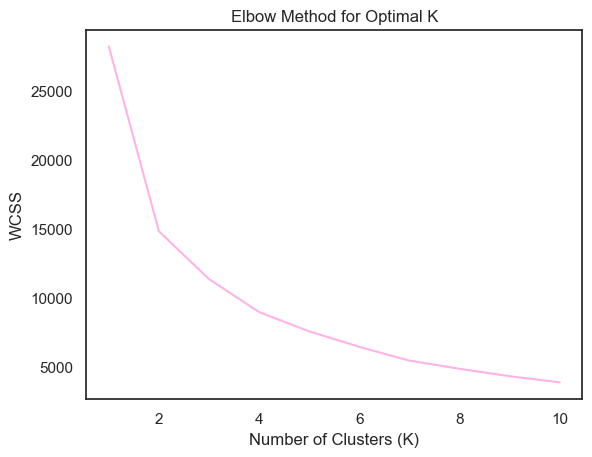

In [89]:
from sklearn.cluster import KMeans, DBSCAN, MeanShift

# Calculate the sum of squared distances for different values of K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(PCA_ds)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()


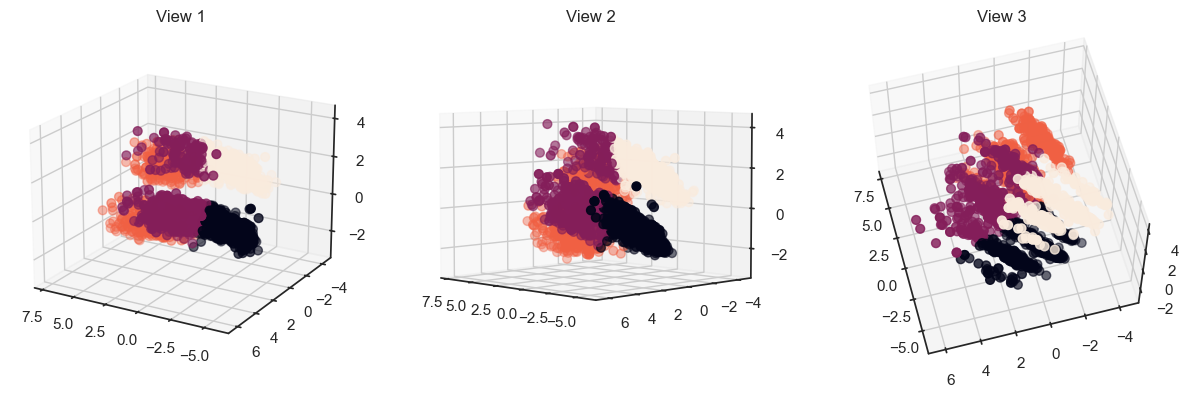

In [120]:
optimal_K = 4

kmeans = KMeans(n_clusters=optimal_K, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_clusters = kmeans.fit_predict(PCA_ds)

PCA_ds["Clusters"] = kmeans_clusters

# Visualize the clusters from three different angles
fig = plt.figure(figsize=(15, 5))

# First subplot (1st view)
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o')
ax1.set_title("View 1")

# Second subplot (2nd view)
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o')
ax2.set_title("View 2")


# Third subplot (3rd view)
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o')
ax3.set_title("View 3")

ax1.view_init(elev=20, azim=120)
ax2.view_init(elev=5, azim=135)
ax3.view_init(elev=60, azim=165)

plt.show()

In [125]:
PCA_ds_dbscan = PCA_ds.drop("Clusters", axis=1).copy()

Best Silhouette Score: 0.003430747737806675
Best eps: 0.4
Best min_samples: 5


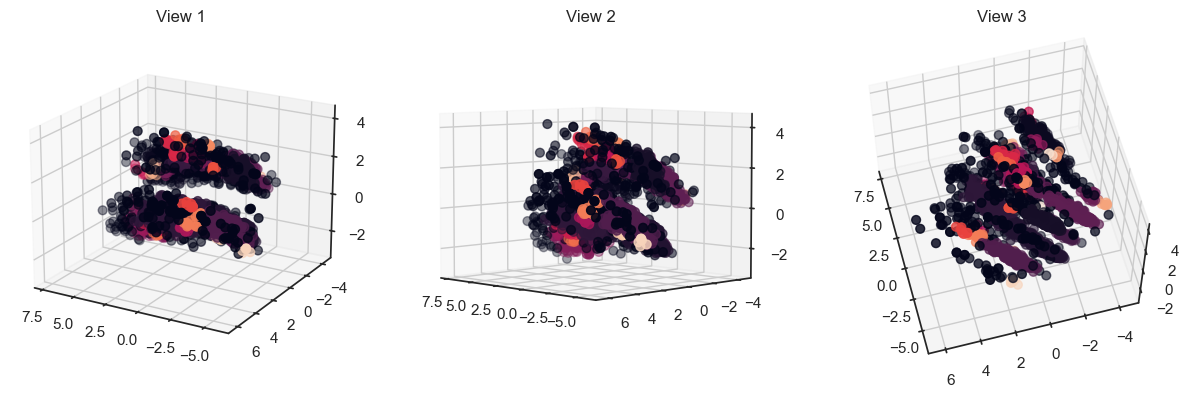

In [126]:
from sklearn.metrics import silhouette_score

# Define a range of values for eps and min_samples to search
eps_values = [0.2, 0.3, 0.4]
min_samples_values = [5, 10, 15]

best_score = -1
best_eps = None
best_min_samples = None

# Loop through different combinations of hyperparameters
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_clusters = dbscan.fit_predict(PCA_ds)
        
        # Compute the silhouette score for the clustering
        silhouette_avg = silhouette_score(PCA_ds, dbscan_clusters)
        
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_eps = eps
            best_min_samples = min_samples

print("Best Silhouette Score:", best_score)
print("Best eps:", best_eps)
print("Best min_samples:", best_min_samples)

# Now, perform DBSCAN clustering with the best hyperparameters
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_dbscan_clusters = best_dbscan.fit_predict(PCA_ds)

from mpl_toolkits.mplot3d import Axes3D

# Visualize the clusters from three different angles
fig = plt.figure(figsize=(15, 5))

# First subplot (1st view)
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(x, y, z, s=40, c=best_dbscan_clusters, marker='o')
ax1.set_title("View 1")

# Second subplot (2nd view)
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(x, y, z, s=40, c=best_dbscan_clusters, marker='o')
ax2.set_title("View 2")


# Third subplot (3rd view)
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(x, y, z, s=40, c=best_dbscan_clusters, marker='o')
ax3.set_title("View 3")

ax1.view_init(elev=20, azim=120)
ax2.view_init(elev=5, azim=135)
ax3.view_init(elev=60, azim=165)

plt.show()


**Profiling**

<Figure size 640x480 with 0 Axes>

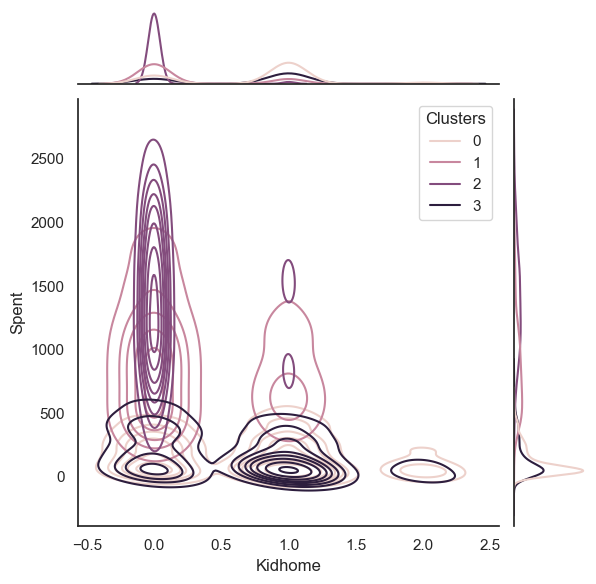

<Figure size 640x480 with 0 Axes>

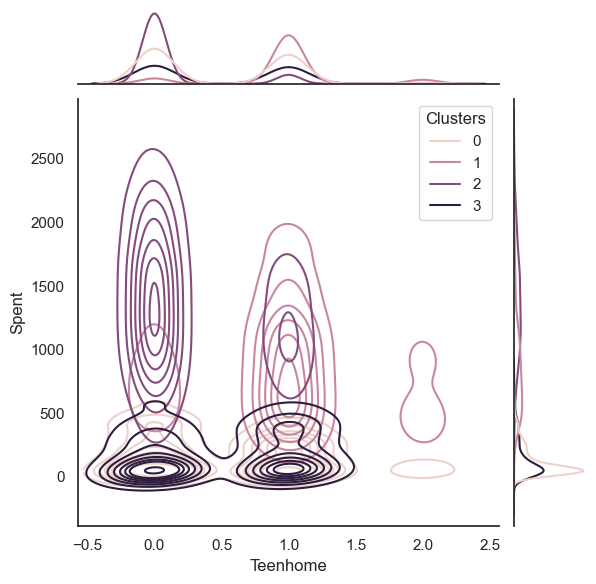

<Figure size 640x480 with 0 Axes>

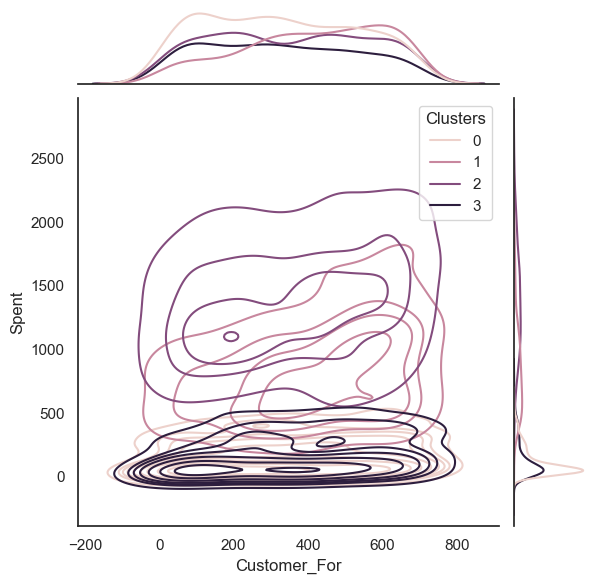

<Figure size 640x480 with 0 Axes>

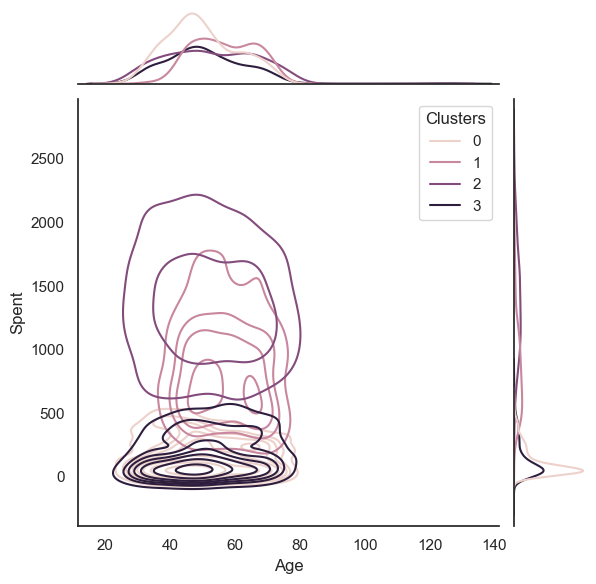

<Figure size 640x480 with 0 Axes>

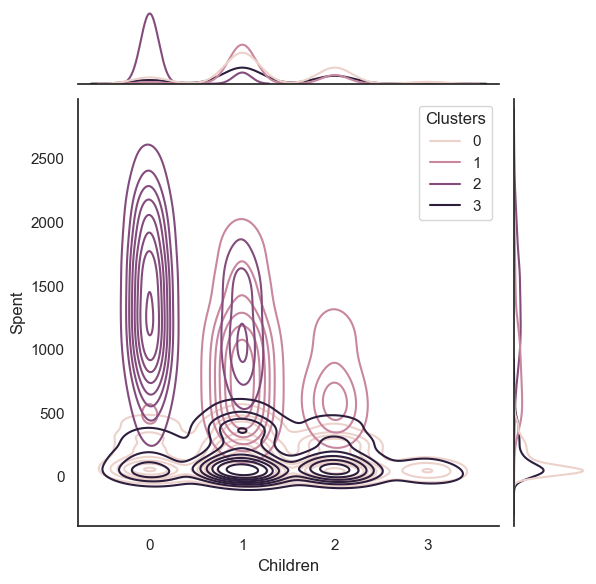

<Figure size 640x480 with 0 Axes>

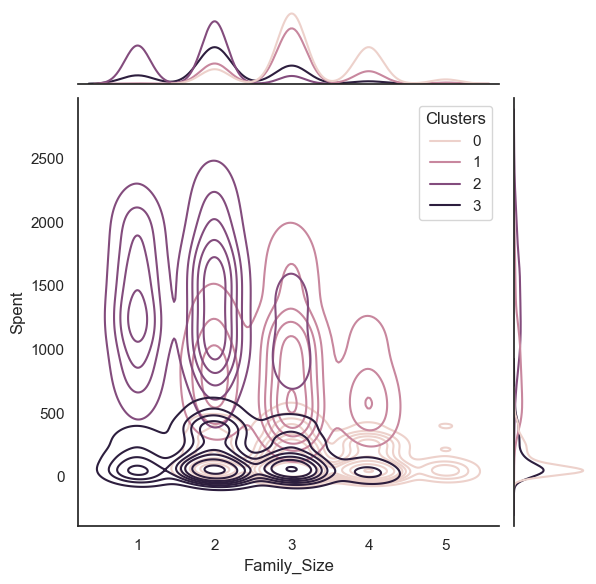

<Figure size 640x480 with 0 Axes>

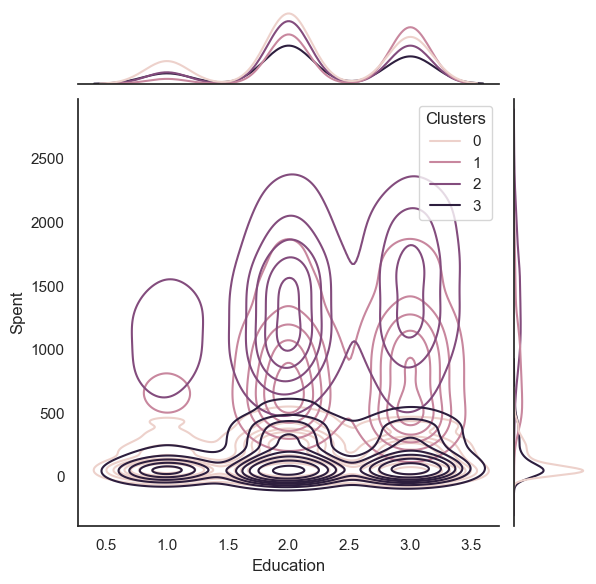

c:\Users\azizs\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 640x480 with 0 Axes>

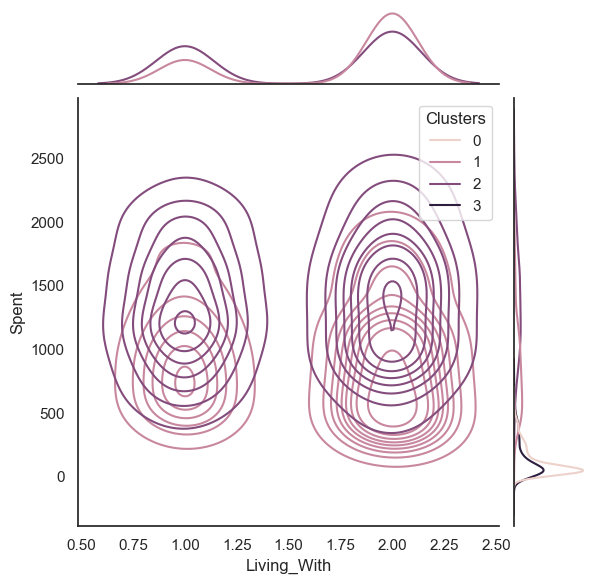

In [152]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Spent"], hue =PCA_ds["Clusters"], kind="kde")
    plt.show()